***В данном проекте анализ будет производиться на данных online_retail_II.csv, который был взят с kaggle.com***

**Цель этого ноутбука: загрузить и очистить данные, проверить качество, сделать базовый EDA, сохранить данные для будущих ноутбуков**

**Описание дата-сета:**

Invoice (object) — номер счёта/заказа (инвойса). Один заказ включает несколько строк (разные товары).

StockCode (object) — код товара (SKU).

Description (object) — описание товара (текст). 

Quantity (int64) — количество единиц товара в строке. 

InvoiceDate (object) — дата и время операции/покупки 

Price (float64) — цена за единицу товара.

Customer ID (float64) — идентификатор клиента. 

Country (object) — страна клиента/доставки.

In [ ]:
# Импортируем необходимые библиотеки и загрузим данные

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Users/natan/online_retail_II.csv') # Загрузим данные
df.shape # Определим размерность: 1067371 x 8
df.info() # Посмотрим на типы данных 
df.head(10) # Посмотрим на первые 10 строк в датасете 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [ ]:
# В этом блоке проведем очистку данных от пропусков

# Создадим копию дата-сета для удобства работы 
df_cleaned = df.copy() 

df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate']) # Сразу переведем InvoiceDate в формат datetime для корректного анализа

# Уберем пропуски в ключевых столбцах
df_cleaned = df_cleaned.dropna(subset=['Invoice', 'InvoiceDate', 'StockCode', 'Quantity', 'Price', 'Customer ID', 'Country'])

# Оставляем только покупки
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Price'] > 0)] 

# Переведем Customer ID в int, чтобы избавиться от .0 для удобства работы, а так же переименуем в более корректное название
df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype(int)
df_cleaned = df_cleaned.rename(columns={'Customer ID':'Customer_ID'})

# Создадим столбец с выручкой и посчитаем ее
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

# Создадим вспомогательный столбец с месяцем для удобства построения будущих графиков
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period("M").dt.to_timestamp()

# Посмотрим на готовый датасет
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Revenue,Month
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.00,2011-12-01
1049357,580523,22792,FLUTED ANTIQUE CANDLE HOLDER,12,2011-12-04 15:00:00,0.85,17827,United Kingdom,10.20,2011-12-01
1049371,580523,20761,BLUE PAISLEY SKETCHBOOK,1,2011-12-04 15:00:00,3.75,17827,United Kingdom,3.75,2011-12-01
1049370,580523,20766,GARDEN PATH SKETCHBOOK,2,2011-12-04 15:00:00,3.75,17827,United Kingdom,7.50,2011-12-01
1049369,580523,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,3,2011-12-04 15:00:00,1.25,17827,United Kingdom,3.75,2011-12-01
...,...,...,...,...,...,...,...,...,...,...
27435,491699,21676,FLOWERS STICKERS,12,2009-12-13 13:39:00,0.85,15628,United Kingdom,10.20,2009-12-01
27436,491699,21253,SET OF PICTURE FRAME STICKERS,6,2009-12-13 13:39:00,2.95,15628,United Kingdom,17.70,2009-12-01
27437,491699,21210,SET OF 72 RETRO SPOT PAPER DOILIES,24,2009-12-13 13:39:00,1.45,15628,United Kingdom,34.80,2009-12-01
27438,491699,84987,SET OF 36 TEATIME PAPER DOILIES,12,2009-12-13 13:39:00,1.45,15628,United Kingdom,17.40,2009-12-01


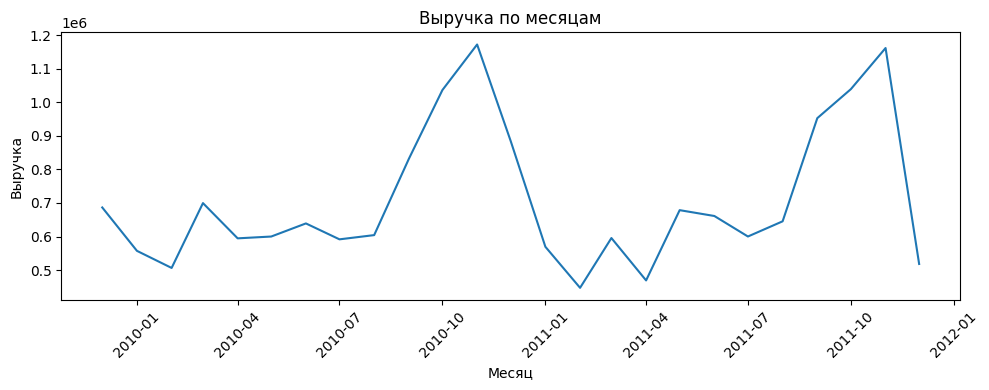

In [ ]:
# Построим первый график: Выручка по месяцам

# Сгруппируем данные по месяцам с общей выручкой
revenue_per_month = df_cleaned.groupby('Month', as_index=False)['Revenue'].sum() 

#Соберем и построим график по сгруппированным данным
plt.figure(figsize=(10,4))
plt.plot(revenue_per_month['Month'], revenue_per_month['Revenue'])
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


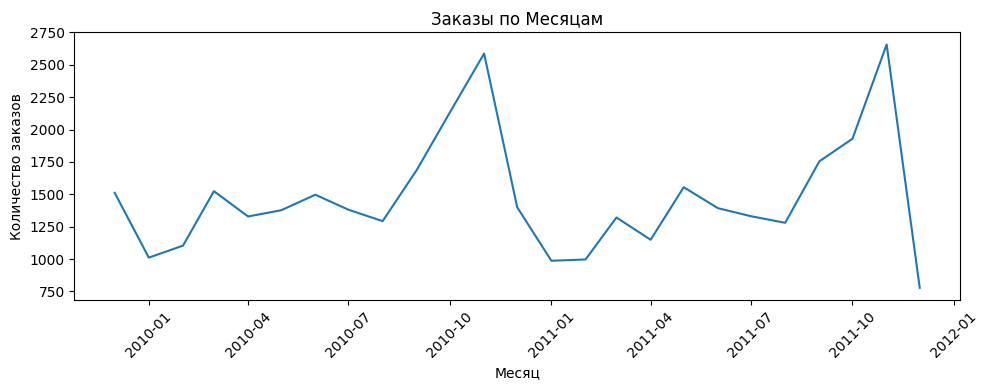

In [ ]:
# Построим второй график: количество заказов по месяцам

# Сгруппируем данные по месяцам с количеством заказов
orders_per_month = df_cleaned.groupby('Month')['Invoice'].nunique().reset_index(name='Orders')

#Соберем и построим график по сгруппированным данным
plt.figure(figsize=(10,4))
plt.plot(orders_per_month['Month'], orders_per_month['Orders'])
plt.title('Заказы по Месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


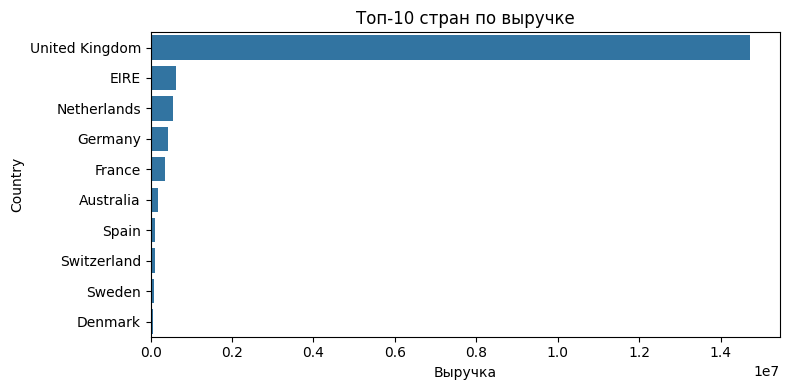

In [87]:
# Построим третий график: Топ-10 стран по выручке

top_10_revenue = (
    df_cleaned.groupby('Country', as_index=False)['Revenue'].sum()
    .sort_values('Revenue', ascending=False)
    .head(10)
    )

#Соберем и построим график по сгруппированным данным
plt.figure(figsize=(8,4))
sns.barplot(data=top_10_revenue, x='Revenue', y='Country')
plt.title('Топ-10 стран по выручке')
plt.xlabel('Выручка')
plt.tight_layout()
plt.show()


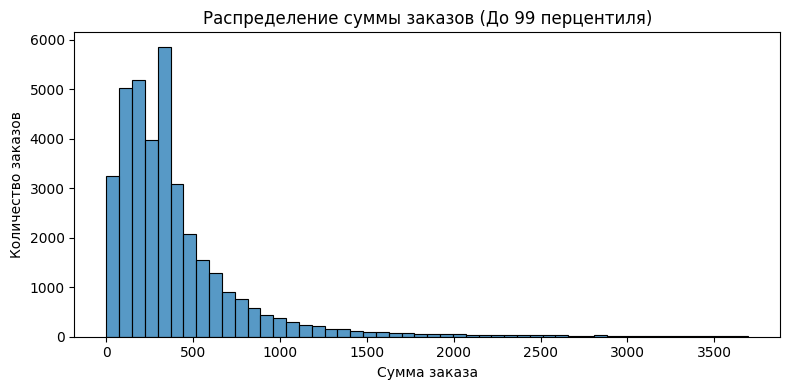

In [93]:
# Построим четвертый график: распределение сумм заказов

# Посчитаем выручку каждого заказа
orders_total = df_cleaned.groupby('Invoice', as_index=False)['Revenue'].sum()
orders_total.rename(columns={'Revenue': 'Orders_total'}, inplace=True)

# Чтобы хвост не "сломал" гистограмму ограничимся 99-перцентилем
percentile_99 = orders_total['Orders_total'].quantile(0.99)

plt.figure(figsize=(8,4))
sns.histplot(orders_total[orders_total["Orders_total"] <= percentile_99]["Orders_total"], bins=50)
plt.title("Распределение суммы заказов (До 99 перцентиля)")
plt.xlabel("Сумма заказа")
plt.ylabel("Количество заказов")
plt.tight_layout()
plt.show()

In [94]:
# Сохраним очищенный дата-сет в новый csv файл
df_cleaned.to_csv("Users/natan/transactions_clean.csv", index=False) 